# Taller

Responder las preguntas de analítica acerca de la base de datos de IMDB que se encuentran a lo largo de este documento. Modifique el nombre de este archivo por el número de su documento (123456789.ipynb) y adjúntelo como parte de los entregables del taller.

Nombre: 



### Descargar los datos:
- Tabla de películas
- Archivo .shp y archivos auxiliares con la información necesaria para pintar el mapa

Estos archivos quedarán en la carpeta _/content/IMDBAnalyticsData/_ asociada con el sistema operativo del servidor en el que se está ejecutando google colab. 

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1osH_xhTCW4Qh7f00VU_UaRK5whEXe8dr' -O data
!unzip "/content/data" -d "/content/IMDBAnalyticsData/"


--2023-03-02 15:17:41--  https://docs.google.com/uc?export=download&id=1osH_xhTCW4Qh7f00VU_UaRK5whEXe8dr
Resolving docs.google.com (docs.google.com)... 64.233.189.113, 64.233.189.138, 64.233.189.139, ...
Connecting to docs.google.com (docs.google.com)|64.233.189.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vksiacmo1mk5vknnm42k8gh25mhpmd08/1677770250000/15315348669826032119/*/1osH_xhTCW4Qh7f00VU_UaRK5whEXe8dr?e=download&uuid=90f8e99e-c7eb-4dcd-97d2-c43061afe263 [following]
--2023-03-02 15:17:44--  https://doc-14-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vksiacmo1mk5vknnm42k8gh25mhpmd08/1677770250000/15315348669826032119/*/1osH_xhTCW4Qh7f00VU_UaRK5whEXe8dr?e=download&uuid=90f8e99e-c7eb-4dcd-97d2-c43061afe263
Resolving doc-14-6c-docs.googleusercontent.com (doc-14-6c-docs.googleusercontent.com)... 64.233.188.132, 2404:6800:


### Importar las librerías necesarias

La libreia geopandas, que sirve para el procesamiento de archivos con información geográfica (shapefiles) no está instalada por defecto en el ambiente de google colab. Por esta razón, debe instalarla

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 38.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

### Información básica de la tabla de películas

In [ ]:
df = pd.read_csv('IMDBAnalyticsData/Data/movie_metadata.csv')
df.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


**Pregunta 1**

Utilice histogramas para comparar la distribución de la columna _imdb_score_ relacionada con películas producidas en Francia y Canadá.

Para crear el histograma:

- Ajuste el número de _bins_ a 20
- De nombres a las etiquetas de los ejes (xAxis y yAxis)
- Remueva el _grid_

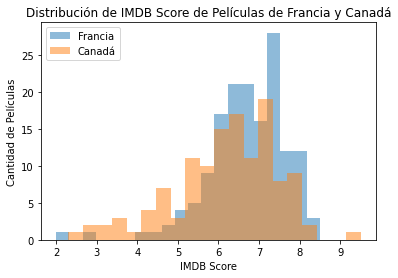

In [ ]:
df_france = df.loc[df['country'] == 'France', ['imdb_score', 'country']]
df_canada = df.loc[df['country'] == 'Canada', ['imdb_score', 'country']]
plt.hist(df_france['imdb_score'], bins=20, alpha=0.5, label='Francia')
plt.hist(df_canada['imdb_score'], bins=20, alpha=0.5, label='Canadá')
plt.xlabel('IMDB Score')
plt.ylabel('Cantidad de Películas')
plt.title('Distribución de IMDB Score de Películas de Francia y Canadá')
plt.legend(loc='upper left')
plt.grid(False)

**Pregunta 2**

Cree un histograma para mirar la distribución de la columna _imdb_score_ de las películas producidas en blanco y negro.

Para crear el histograma:

- Ajuste el número de _bins_ a 10
- De nombres a las etiquetas de los ejes (xAxis y yAxis)
- Remueva el _grid_

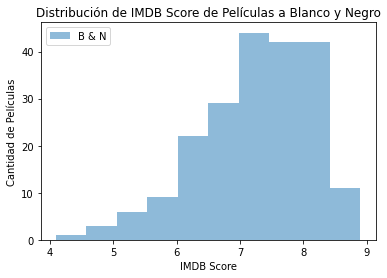

In [ ]:

df_blancoNegro = df.loc[df['color'] == ' Black and White' ,['imdb_score', 'color']] 
plt.hist(df_blancoNegro['imdb_score'], bins=10, alpha=0.5, label='B & N')
plt.xlabel('IMDB Score')
plt.ylabel('Cantidad de Películas')
plt.title('Distribución de IMDB Score de Películas a Blanco y Negro')
plt.legend(loc='upper left')
plt.grid(False)


**Pregunta 3**

¿Qué país tiene el mayor promedio de calificación de películas? Utilice figuras de barras para visualizar los resultados.  



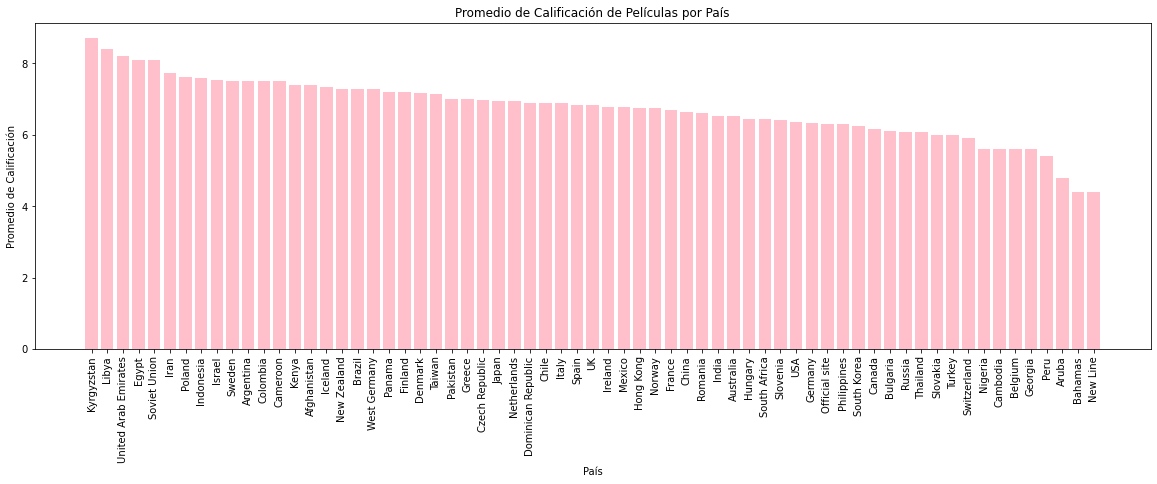

In [ ]:
df_promedio = df.groupby('country')['imdb_score'].mean().sort_values(ascending=False)

plt.figure(figsize=(20, 6))
plt.bar(df_promedio.index, df_promedio.values, color='pink')

plt.xlabel('País')
plt.ylabel('Promedio de Calificación')
plt.title('Promedio de Calificación de Películas por País')
plt.xticks(rotation=90)
plt.grid(False) 

**Pregunta 4** 

¿Cuántas películas a blanco y negro y cuántas películas a color se tienen en la base de datos?


El número de películas producidas a Color es: 4815
El número de películas producidas a Blanco y Negro es: 209


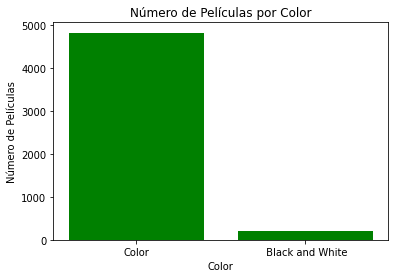

In [ ]:
count = df['color'].value_counts() 

plt.bar(count.index, count.values, color='green') 
plt.xlabel('Color')
plt.ylabel('Número de Películas')
plt.title('Número de Películas por Color')
plt.grid(False)
print("El número de películas producidas a Color es:", count['Color'])
print("El número de películas producidas a Blanco y Negro es:", count[' Black and White'])

**Pregunta 5**

¿Cuál película de Christopher Nolan tiene la mayor calificación (_imdb_score_)? Utilice figuras de barras para visualizar los resultados.

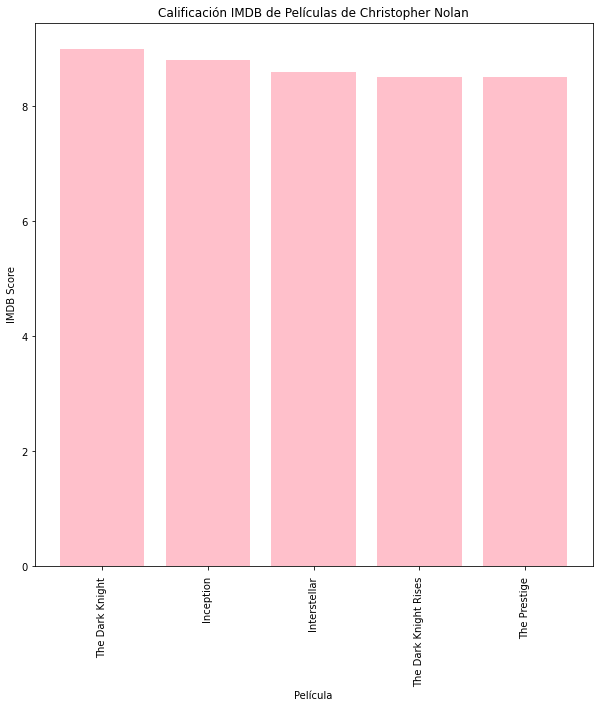

In [ ]:
df_nolan = df.loc[df['director_name'] == 'Christopher Nolan'].sort_values('imdb_score', ascending=False).head(5)

plt.figure(figsize=(10, 10))
plt.bar(df_nolan['movie_title'], df_nolan['imdb_score'], color='pink')

plt.xlabel('Película')
plt.ylabel('IMDB Score')
plt.title('Calificación IMDB de Películas de Christopher Nolan')
plt.xticks(rotation=90)
plt.grid(False)

**Pregunta 6**

Utilice un _line chart_ para visualizar cuántas películas se produjeron en USA desde el 2010 hasta el 2015.

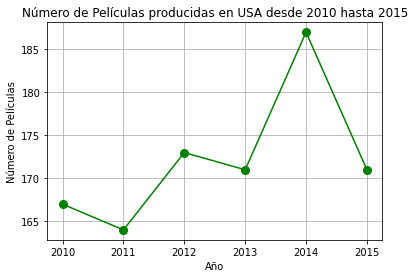

In [ ]:
df_usa = df.loc[(df['country'] == 'USA') & (df['title_year'] >= 2010) & (df['title_year'] <= 2015)]

df_count = df_usa.groupby('title_year')['movie_title'].count()
plt.plot(df_count.index, df_count.values, marker='o', markersize=8, color='green')

plt.xlabel('Año')
plt.ylabel('Número de Películas')
plt.title('Número de Películas producidas en USA desde 2010 hasta 2015')
plt.grid(True)

**Pregunta 7**

Grafique en un mapa el _imdb_score_ promedio de las películas producidas en cada país.

(-197.99999999999991, 198.0, -62.8702555605499, 90.06827386555007)

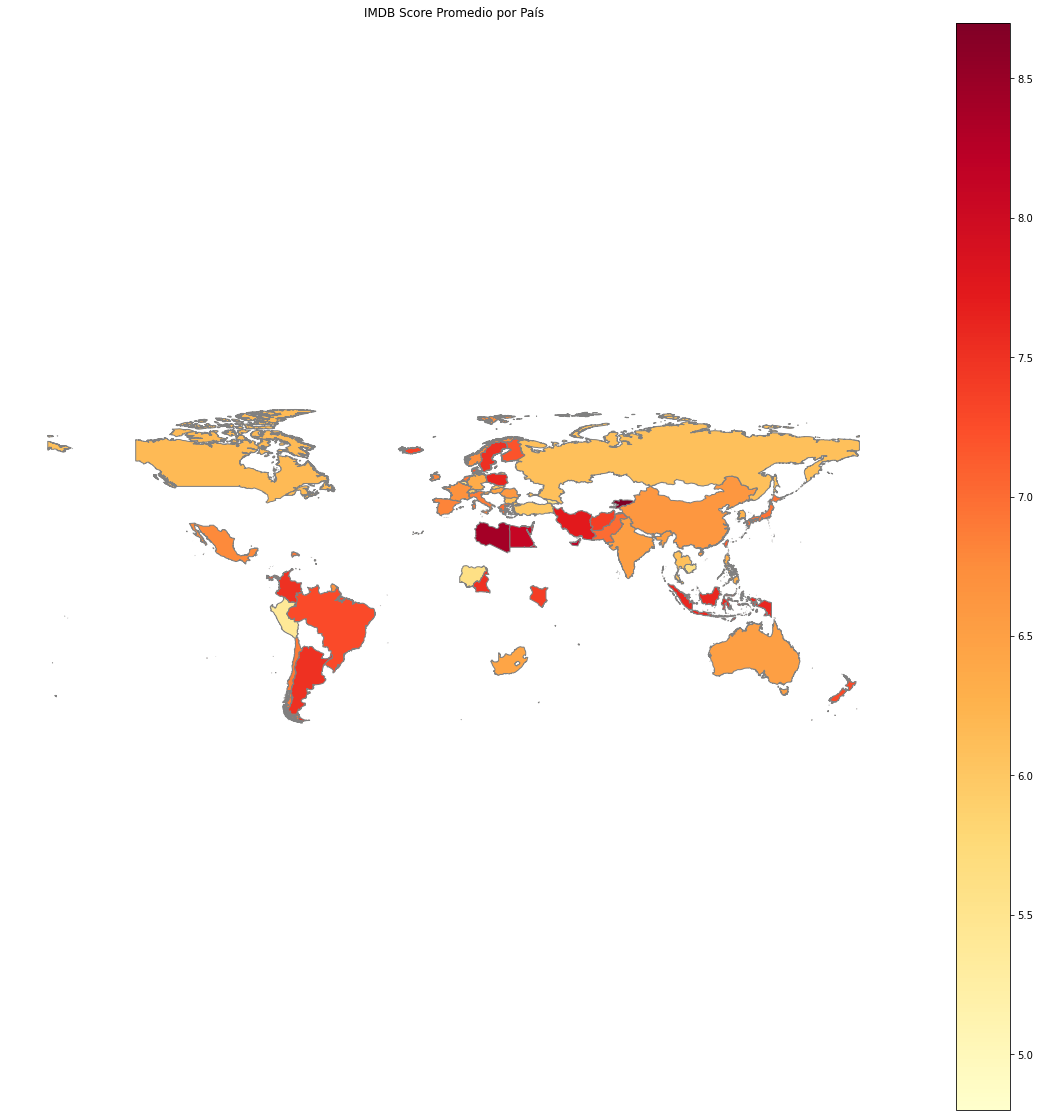

In [ ]:
df_avg = df.groupby('country')['imdb_score'].mean().reset_index()

shpfile = 'IMDBAnalyticsData/Data/Map/ne_10m_admin_0_countries.shp'
geo_df = gpd.read_file(shpfile)[['ADMIN', 'ADM0_A3', 'geometry']]

merged = geo_df.merge(df_avg, left_on='ADMIN', right_on='country', how='left')

fig, ax = plt.subplots(figsize=(20, 20))

merged.plot(column='imdb_score', cmap='YlOrRd', ax=ax, legend=True,  edgecolor='grey', linewidth=1)

ax.set_title('IMDB Score Promedio por País')
ax.set_axis_off()
plt.axis('equal')

**Pregunta 8**

¿Qué información de su proyecto podría utilizar para hacer analítica de datos?


In [ ]:
# Información de Gastos, Ahorros y Progreso de Metas